In [2]:
from mp_api.client import MPRester

api_key = "0MIdeGt8gLunUNVkHwvlPHzlsFgAv90f"

min_gap = 0.6
max_gap = 3.0

with MPRester(api_key) as mpr:
  materials = mpr.summary.search(band_gap=(min_gap, max_gap))


C:\Users\yaoningqu\AppData\Local\Temp\ipykernel_18792\211725333.py:9: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  materials = mpr.summary.search(band_gap=(min_gap, max_gap))
Retrieving SummaryDoc documents:   0%|          | 0/42138 [00:00<?, ?it/s]c:\Users\yaoningqu\AppData\Local\Programs\Python\Python310\lib\site-packages\mp_api\client\core\client.py:829: UserWarning: Use the 'fields' argument to select only fields of interest to speed up data retrieval for large queries. Choose from: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull

In [3]:
import pandas as pd
lat_vec,orb_pos,band_gap = []
for i in range(0,42138):
    lat_vec.append(materials[""])
    orb_pos.append(materials[""])
    band_gap.append(materials[""])
train = {
    "lat":lat_vec[0:32138],
    "orb":orb_pos[0:32138],
    "gap":band_gap[0:32138]
}
val ={
    "lat":lat_vec[32138:42138],
    "orb":orb_pos[32138:42138],
    "gap":band_gap[32138:42138]
}
train_df = pd.DataFrame(train)
val_df = pd.DataFrame(val)

ValueError: not enough values to unpack (expected 3, got 0)

In [4]:
print(materials[3705])

MPDataDoc<SummaryDoc>
builder_meta=EmmetMeta(emmet_version='0.72.20', pymatgen_version='2023.11.12', pull_request=990, database_version='2023.11.1', build_date=datetime.datetime(2023, 11, 22, 19, 49, 12, 591000), license='BY-C'),
nsites=40,
elements=[Element Ba, Element Cr, Element La, Element O, Element Ti],
nelements=5,
composition=Composition('Ba4 La4 Ti4 Cr4 O24'),
composition_reduced=Composition('Ba1 La1 Ti1 Cr1 O6'),
formula_pretty='BaLaTiCrO6',
formula_anonymous='ABCDE6',
chemsys='Ba-Cr-La-O-Ti',
volume=505.81046496413796,
density=6.199374773859104,
density_atomic=12.64526162410345,
symmetry=SymmetryData(crystal_system=<CrystalSystem.ortho: 'Orthorhombic'>, symbol='Pmma', number=51, point_group='mmm', symprec=0.1, version='2.0.2'),
property_name='summary',
material_id=MPID(mp-39208),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2023, 11, 22, 19, 49, 12, 591000),
origins=[PropertyOrigin(name='structure', task_id=MPID(mp-1826664), last_updated=datetim

In [5]:
print(materials[3705].structure.cart_coords) #return orbit coords

[[0.00000000e+00 4.24297200e+00 1.81351892e+01]
 [0.00000000e+00 1.41432400e+00 2.10050526e+01]
 [0.00000000e+00 4.24297200e+00 1.43679437e+00]
 [0.00000000e+00 1.41432400e+00 4.30665776e+00]
 [0.00000000e+00 4.24297200e+00 7.16942954e+00]
 [0.00000000e+00 4.24297200e+00 1.26426145e+01]
 [0.00000000e+00 1.41432400e+00 9.79923249e+00]
 [0.00000000e+00 1.41432400e+00 1.52724175e+01]
 [1.99200450e+00 4.24297200e+00 2.10044243e+01]
 [1.99200450e+00 4.24297200e+00 4.32977287e+00]
 [1.99200450e+00 1.41432400e+00 1.43742274e+00]
 [1.99200450e+00 1.41432400e+00 1.81120741e+01]
 [1.99200450e+00 4.24297200e+00 9.85493316e+00]
 [1.99200450e+00 1.41432400e+00 7.08695575e+00]
 [1.99200450e+00 1.41432400e+00 1.25869138e+01]
 [1.99200450e+00 4.24297200e+00 1.53548913e+01]
 [1.99200450e+00 2.83233656e+00 1.95678543e+01]
 [1.99200450e+00 0.00000000e+00 0.00000000e+00]
 [1.99200450e+00 2.82495944e+00 2.87399269e+00]
 [1.99200450e+00 2.83072988e+00 8.46627655e+00]
 [1.99200450e+00 5.57645890e+00 5.749668

In [6]:
def average_columns(data):
  """
  Calculates the average of each column (0th, 1st, and 2nd index) in a list of lists.

  Args:
      data: A list of lists, where each inner list contains 3 floats.

  Returns:
      A list containing the average of each column in the input data.
  """

  # Initialize empty lists to store the sums for each column
  col_sums = [0, 0, 0]

  # Iterate through the data and accumulate sums for each column
  for row in data:
    for i, value in enumerate(row):
      col_sums[i] += value

  # Calculate the average for each column by dividing the sum by the number of elements
  averages = [sum / len(data) for sum in col_sums]

  return averages

# Example usage
data = materials[3705].structure.cart_coords
averages = average_columns(data)
print(averages)  # Output: [4.0, 5.0, 6.0]


[1.1952026999999998, 2.687215599999999, 10.659877325000002]


In [7]:
print(dir(materials[3705].structure.lattice))
print((materials[3705].structure.lattice.get_cartesian_coords
       ))
lattice_vec = str(materials[3705].structure.lattice)

['REDIRECT', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__get_validators__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__modify_schema__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_calculate_lll', '_diags', '_generic_json_schema', '_get_partial_json', '_inv_matrix', '_lll_inverse', '_lll_matrix_mappings', '_matrix', '_pbc', '_validate_monty', 'a', 'abc', 'alpha', 'angles', 'as_dict', 'b', 'beta', 'c', 'copy', 'cubic', 'd_hkl', 'dot', 'find_all_mappings', 'find_mapping', 'from_dict', 'from_parameters', 'gamma', 'get_all_distances', 'get_brillouin_zone', 'get_cartesian_coords', 'get_distance_and_image', 'get_frac_coords_from_lll', 'get_fractional_coords', 'get_lll_frac_coords', 'get_lll_reduced_lattice', 'ge

In [9]:
import numpy as np


def parse_data_1(data_string):
  """
  Parses a string containing numerical data into three separate lists (x, y, and z).

  Args:
      data_string: A string containing the data in rows and columns, separated by spaces.

  Returns:
      A tuple containing three NumPy arrays (x, y, and z).
  """

  # Split the data string into rows
  data_rows = data_string.strip().split("\n")

  # Convert each row into a list of floats
  data = [[float(x) for x in row.split()] for row in data_rows]

  # Separate the data into three lists (x, y, and z)
  x, y, z = zip(*data)

  # Convert the lists to NumPy arrays (optional)
  x = np.array(x)
  y = np.array(y)
  z = np.array(z)

  return x, y, z

def parse_data(data_string):
  """
  Parses a string containing numerical data into a dictionary with rows as keys.

  Args:
      data_string: A string containing the data in rows and columns, separated by spaces.

  Returns:
      A dictionary where keys are row numbers (starting from 1) and values are lists containing the data in that row.
  """

  # Split the data string into rows
  data_rows = data_string.strip().split("\n")

  # Convert each row into a list of floats
  data = {i + 1: [float(x) for x in row.split()] for i, row in enumerate(data_rows)}

  return data

data_dict = parse_data(lattice_vec)

# Print the resulting dictionary
print(data_dict)

{1: [3.984009, 0.0, 0.0], 2: [0.0, 5.657296, 0.0], 3: [0.0, 0.0, 22.441847]}


In [10]:
print((lattice_vec))

3.984009 0.000000 0.000000
0.000000 5.657296 0.000000
0.000000 0.000000 22.441847


In [11]:
import numpy as np

# Define the vectors
v1 = np.array([-0.000000, 0.000000, -2.496004])
v2 = np.array([-2.176733, -2.176733, -1.248002])
v3 = np.array([-2.176733, 2.176733, -1.248002])

# Calculate the dot products
dot_v1v2 = np.dot(v1, v2)
dot_v1v3 = np.dot(v1, v3)
dot_v2v3 = np.dot(v2, v3)

# Calculate the magnitudes of the vectors
mag_v1 = np.linalg.norm(v1)
mag_v2 = np.linalg.norm(v2)
mag_v3 = np.linalg.norm(v3)

# Calculate the angles using the arccosine formula
angle_v1v2 = np.arccos(dot_v1v2 / (mag_v1 * mag_v2)) * 180 / np.pi
angle_v1v3 = np.arccos(dot_v1v3 / (mag_v1 * mag_v3)) * 180 / np.pi
angle_v2v3 = np.arccos(dot_v2v3 / (mag_v2 * mag_v3)) * 180 / np.pi

# Print the angles in degrees
print("Angle between v1 and v2:", angle_v1v2)
print("Angle between v1 and v3:", angle_v1v3)
print("Angle between v2 and v3:", angle_v2v3)

Angle between v1 and v2: 67.93184379118495
Angle between v1 and v3: 67.93184379118495
Angle between v2 and v3: 81.88517169964015


In [12]:
def get_parameters(i):
    return(list(materials[i].structure.lattice.abc)+list(materials[i].structure.lattice.angles)+average_columns(materials[i].structure.cart_coords))
def get_target(i):
    return(materials[i].band_gap)
features =[]
target = []
for i in range(0,42138):
    features.append(get_parameters(i))
    target.append(get_target(i))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
rf = RandomForestRegressor(n_estimators=100,random_state=18)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=18)

In [42]:
print(rf)

RandomForestRegressor(random_state=18)


In [22]:
def mean_squared_error(y_true, y_pred):
  """
  Calculates the mean squared error between true values (y_true) and predictions (y_pred).

  Args:
      y_true (ndarray): Array of true values.
      y_pred (ndarray): Array of predictions.

  Returns:
      float: The mean squared error.
  """

  squared_errors = (y_true - y_pred) ** 2
  mse = np.mean(squared_errors)
  return mse


In [32]:
predictions = rf.predict(x_test)
for i in range(0,1000):
    print(predictions[i],y_test[i])


1.6669239999999999 1.0607000000000002
1.9810739999999967 1.6381000000000001
1.6858240000000004 0.7633999999999999
1.9679589999999996 2.6310000000000002
1.6853389999999997 2.7103
1.7747460000000022 1.6193000000000002
1.780839 2.827
1.8156660000000004 0.6504000000000001
1.991057 1.0567000000000002
1.891467 2.6184
1.797209 2.3015
2.049937000000001 0.7987000000000002
2.123182 2.9711
2.2566400000000018 2.8989000000000003
1.9402129999999982 1.6065
1.756871000000001 2.0787999999999998
2.058236 2.2968
1.3549640000000005 2.8523000000000005
1.2846890000000004 0.7021999999999999
1.9823620000000017 1.8724999999999996
2.157258000000001 2.3141999999999996
2.0104269999999995 2.1925
1.579908 2.2352
1.5084429999999989 0.6463000000000001
1.5108069999999996 1.8626999999999998
1.4995020000000003 2.2452
1.7283020000000007 0.6668000000000001
1.4840800000000005 2.0985
1.411772 1.0948000000000002
1.314896999999999 2.1662
1.5086080000000002 1.6378
1.7706789999999992 2.1354
1.6341150000000004 2.4191
1.596031999

In [28]:
import matplotlib.pyplot as plt
mse = mean_squared_error(y_test, predictions)
rmse = mse**.5
print(mse)
print(rmse)
def plot_parity(y_test,predictions):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.1, label='Predictions')
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Parity')

    # Set labels and title
    plt.xlabel('True Values (y_test)')
    plt.ylabel('Predicted Values')
    plt.title('Parity Plot')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


0.3950357330362232
0.6285186815331929


In [15]:
trainings = rf.predict(x_train)
for i in range(0,1000):
    print(trainings[i],y_train[i])

1.5658980000000002 1.7495
1.1150259999999996 0.9289000000000001
2.372550999999997 2.6872000000000003
2.4504039999999963 2.676
0.8562609999999993 0.7037
1.0934339999999998 1.0184000000000002
1.7855610000000022 1.8049
2.522191000000001 2.9760999999999997
2.2147109999999985 2.2525
2.0447239999999987 2.1446000000000005
0.9582620000000008 0.8285
1.3195519999999978 1.2451000000000003
2.4626880000000018 2.7143
1.375579000000001 1.1808
1.6226790000000013 1.3331000000000004
1.700388 1.8536000000000001
2.563464999999999 2.9271000000000003
2.1933650000000027 2.4302
1.9352049999999983 1.8226999999999998
1.0706529999999987 0.6561999999999992
2.294204999999998 2.736999999999999
0.9925399999999999 0.6738
1.0571219999999995 0.8200000000000003
2.458526000000002 2.8606
1.3252799999999991 1.1834999999999996
0.8531209999999994 0.6827000000000001
1.3401809999999994 1.2101000000000002
2.1120149999999978 2.0074
2.0808309999999977 2.2436999999999996
1.4525420000000018 1.3691
1.8354879999999973 1.9053999999999

In [21]:
mse = mean_squared_error(y_train, trainings)
rmse = mse**.5
print(mse)
print(rmse)

0.055555168604559856
0.23570143954706738


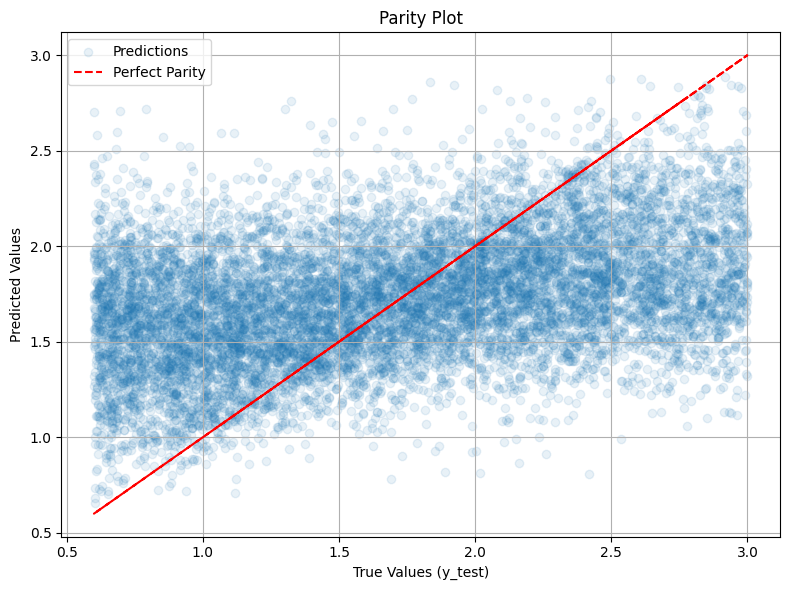

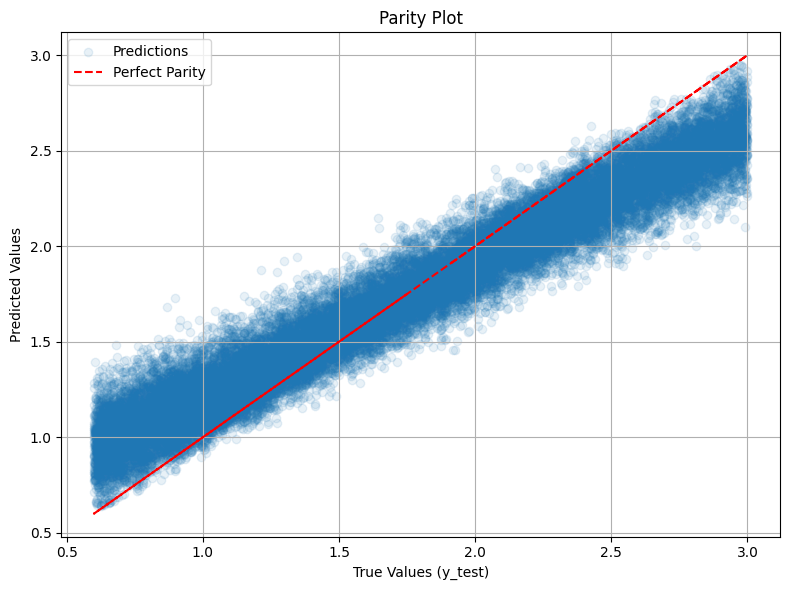

In [31]:
plot_parity(y_test,predictions)
plot_parity(y_train,trainings)

In [40]:
branches = []
rdms = []
tst_mse = []
trn_mse = []
def model_train(branch,rdm):
    rf = RandomForestRegressor(n_estimators=branch,random_state=rdm)
    rf.fit(x_train,y_train)
    predictions = rf.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse**.5
    print(branch," ",rdm)
    print("test mse:"+str(mse))
    print("test rmse:"+str(rmse))
    tst_mse.append(mse)
    trainings = rf.predict(x_train)
    mse = mean_squared_error(y_train, trainings)
    rmse = mse**.5
    print("train mse:"+str(mse))
    print("train rmse:"+str(rmse))
    trn_mse.append(mse)
    plot_parity(y_test,predictions)
    plot_parity(y_train,trainings)
    branches.append(branch)
    rdms.append(rdm)

1000   18
test mse:0.3910573141454863
test rmse:0.6253457556787975
train mse:0.0538035192463358
train rmse:0.231955856244967


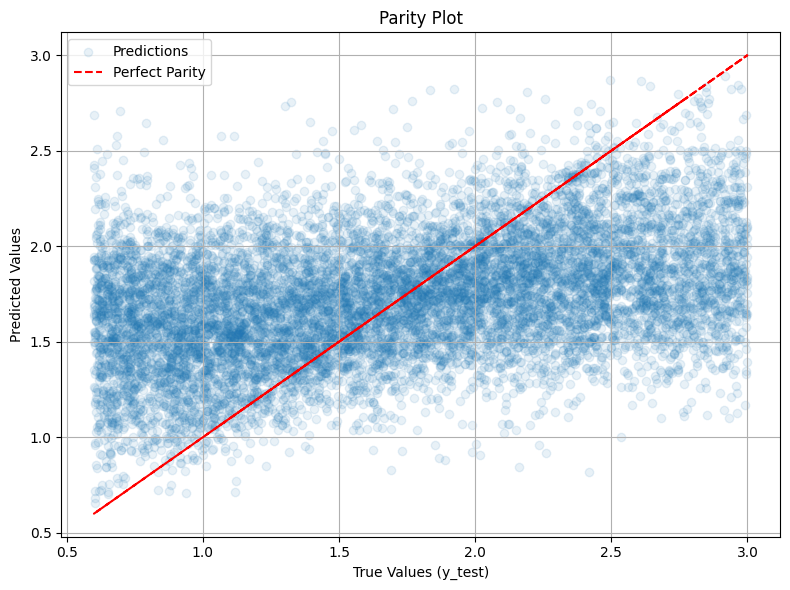

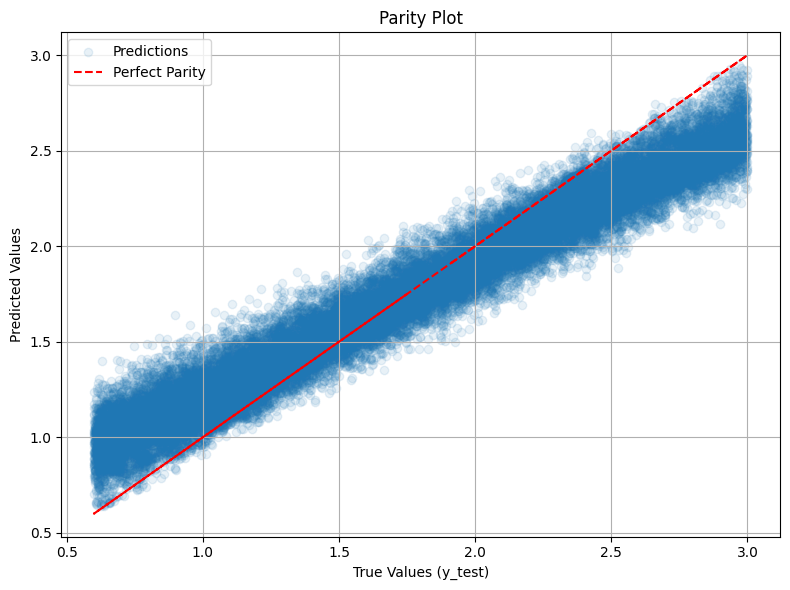

1100   18
test mse:0.3911418345268144
test rmse:0.6254133309474738
train mse:0.05381597686293848
train rmse:0.23198270811191612


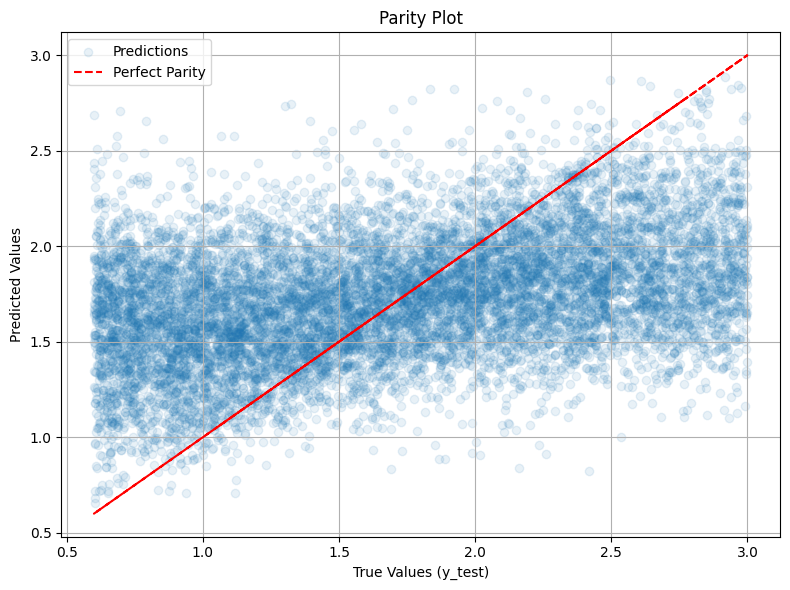

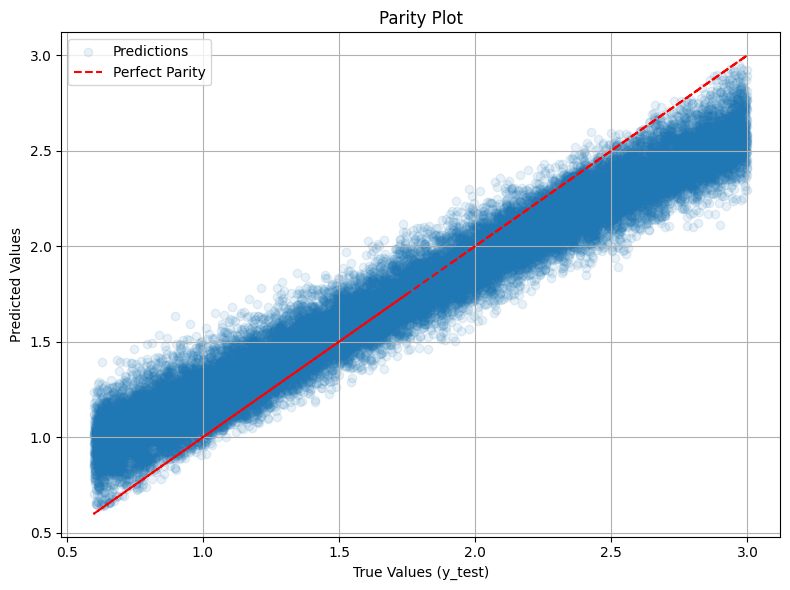

1200   18
test mse:0.39118525416307376
test rmse:0.6254480427366239
train mse:0.05380895786737214
train rmse:0.2319675793454166


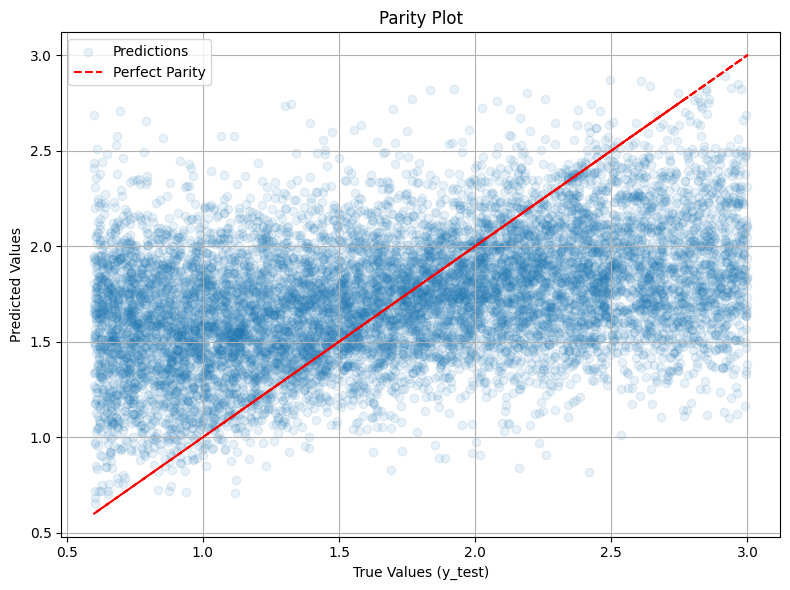

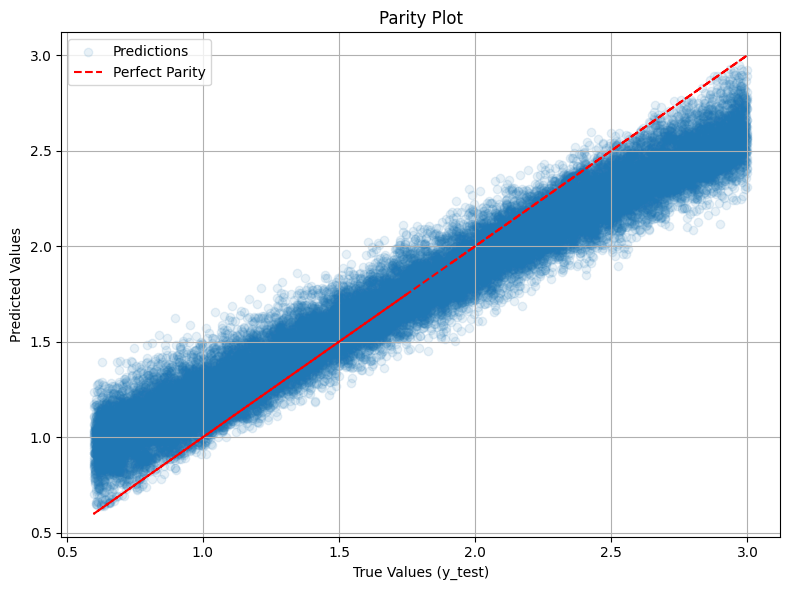

1300   18
test mse:0.39126502419834835
test rmse:0.6255118097992622
train mse:0.05378994949844549
train rmse:0.2319266036884201


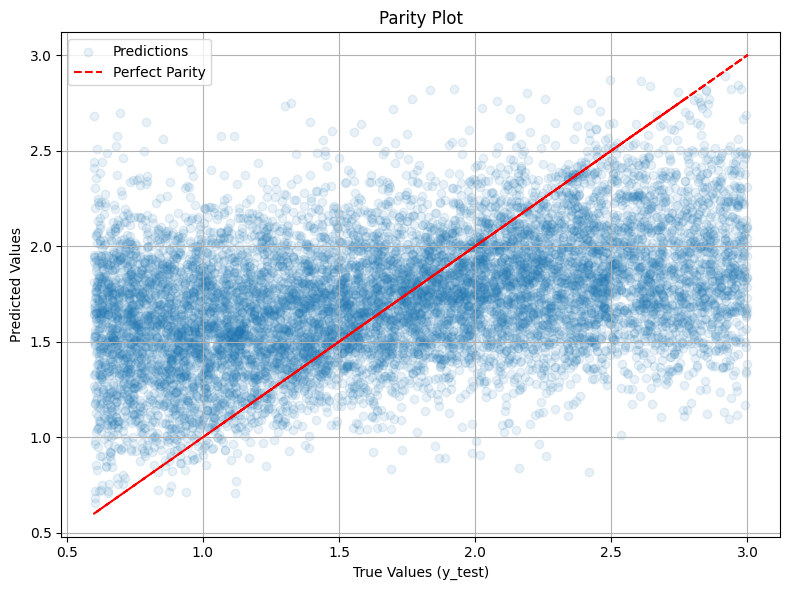

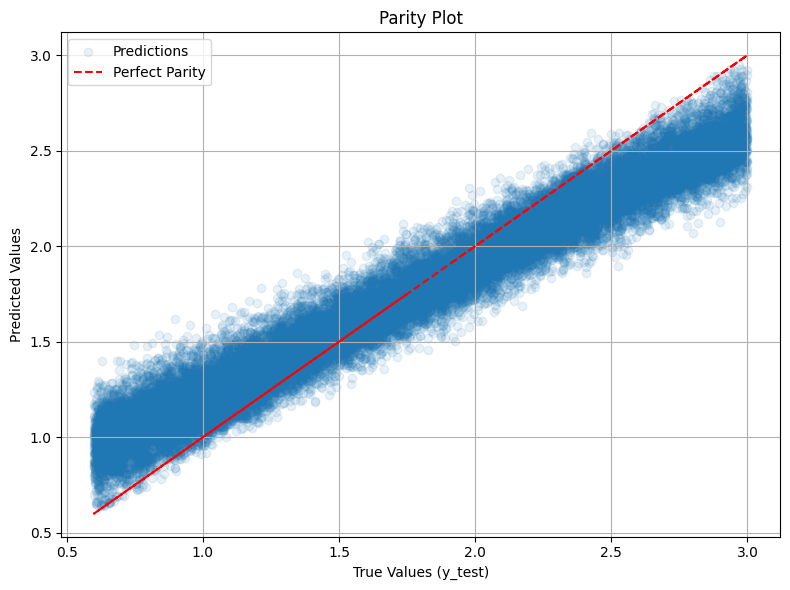

1400   18
test mse:0.3912024629511795
test rmse:0.6254617997537335
train mse:0.053756805470464
train rmse:0.23185513897790577


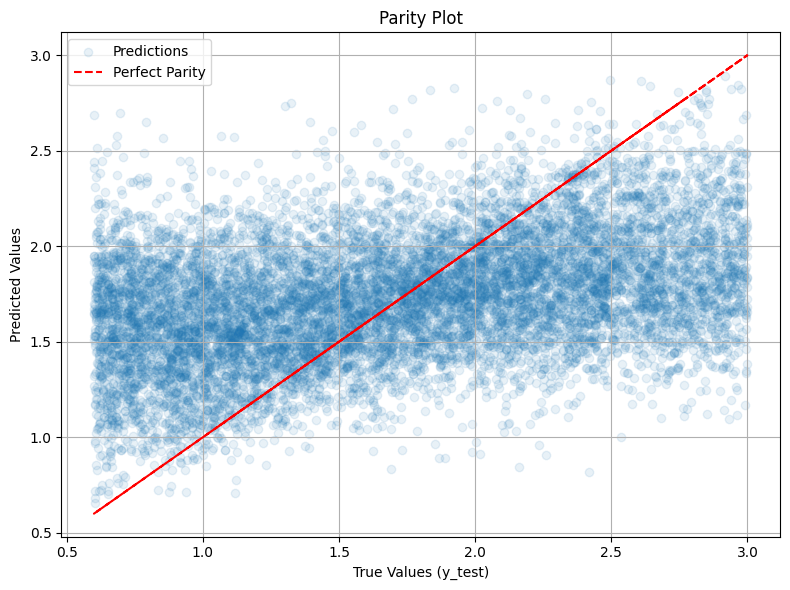

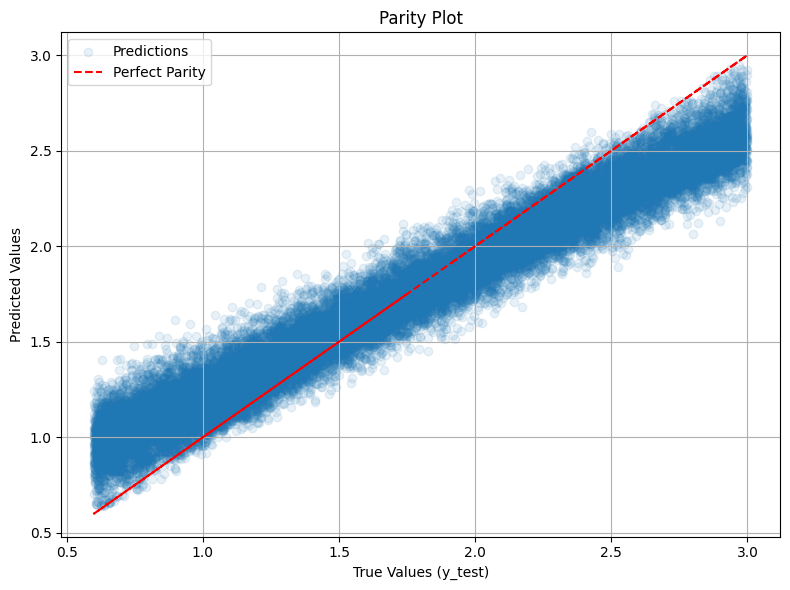

1500   18
test mse:0.39123720647082877
test rmse:0.6254895734309476
train mse:0.05374445655695135
train rmse:0.2318285067823872


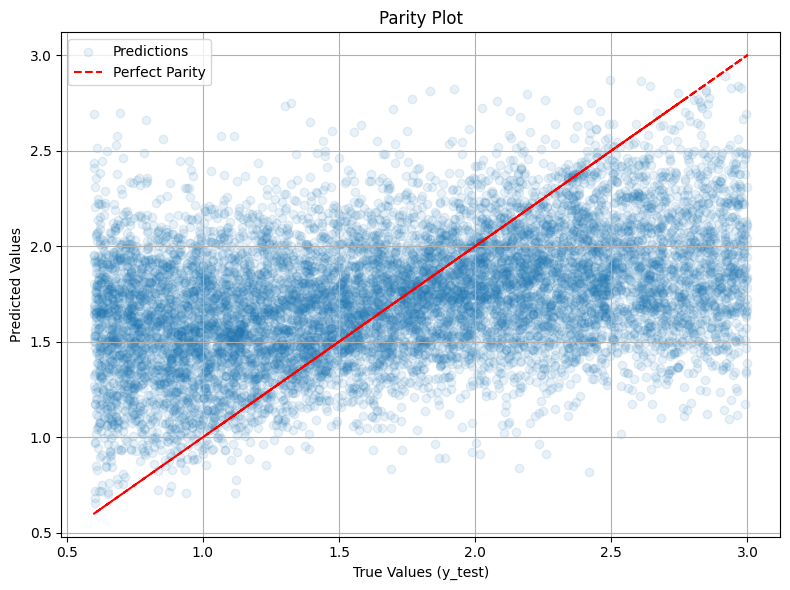

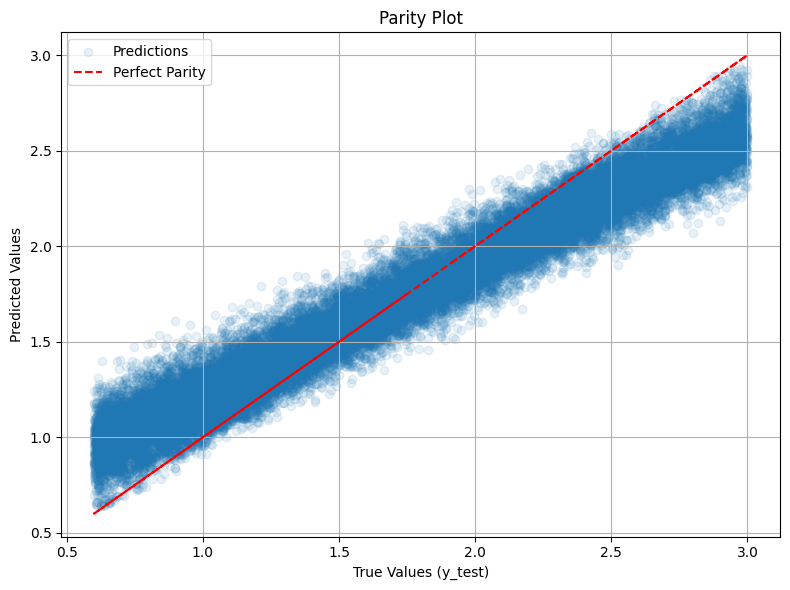

In [52]:
for i in range(10,16):
    model_train(i*100,18)

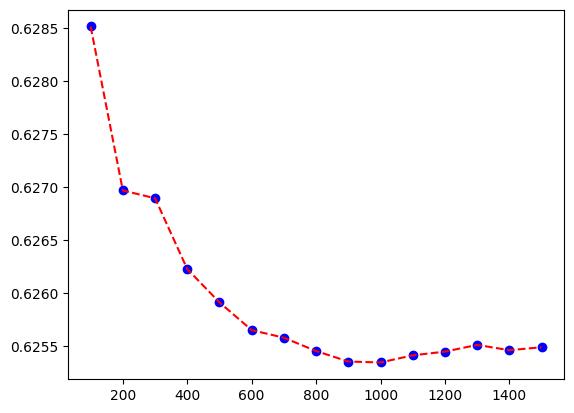

In [56]:
plt.plot(branches,[i**0.5 for i in tst_mse],color = "red", linestyle = '--', label = 'RMSE')
plt.scatter(branches,[i**0.5 for i in tst_mse],color = 'blue')

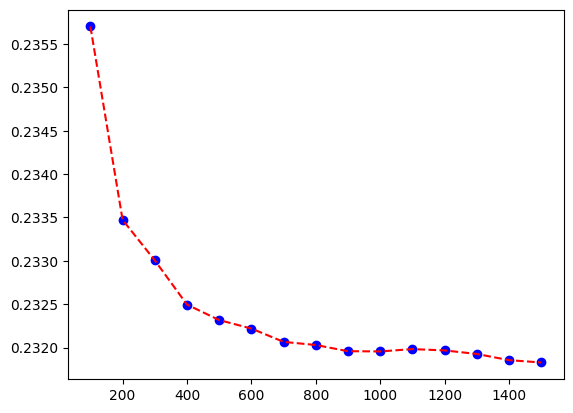

In [55]:
plt.plot(branches,[i**0.5 for i in trn_mse],color = "red", linestyle = '--', label = 'RMSE')
plt.scatter(branches,[i**0.5 for i in trn_mse],color = 'blue')


In [60]:
print(branches[9],trn_mse[9],branches[8],trn_mse[8])

1000 0.0538035192463358 900 0.05380466157609589
